# 🏥 Predição de Obesidade com Machine Learning
### Tech Challenge – Fase 4 | Pós-Tech em Data Analytics
#### Autor: Matheus Amaral

---
## 🎓 Contexto Acadêmico – Pós-Tech em Data Analytics
Este notebook faz parte do projeto integrador da Fase 4 da Pós-Graduação em Data Analytics da Pós-Tech. O Tech Challenge propõe a aplicação prática dos conhecimentos adquiridos nas disciplinas, desenvolvendo uma solução analítica e preditiva com foco em impacto social e estratégico.

---
## 🎯 Desafio
A obesidade é uma condição médica cada vez mais prevalente, associada ao acúmulo excessivo de gordura corporal. Suas causas são multifatoriais e envolvem fatores genéticos, comportamentais e ambientais. A proposta deste projeto é construir um modelo preditivo de Machine Learning capaz de auxiliar equipes médicas no diagnóstico do nível de obesidade de pacientes com base em dados clínicos e comportamentais.

Este sistema tem como objetivo apoiar a tomada de decisão médica, antecipar riscos e contribuir com estratégias preventivas em ambientes hospitalares.


# 📦 Etapa 1 – Carregamento e Exploração Inicial dos Dados

In [1]:
# 📦 Etapa 1 – Carregamento e Exploração Inicial dos Dados
# Importação de bibliotecas necessárias
import pandas as pd
# Importação de bibliotecas necessárias
import numpy as np
# Importação de bibliotecas necessárias
import matplotlib.pyplot as plt
# Importação de bibliotecas necessárias
import seaborn as sns

# Carregando os dados
# Carregando os dados do arquivo CSV
df = pd.read_csv('/content/Obesity.csv')

# Visualização inicial
print(df.shape)
# Exibindo as primeiras linhas do DataFrame
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# 🧽 Etapa 2 – Limpeza e Padronização dos Dados

In [2]:
# 🧽 Etapa 2 – Limpeza e Padronização dos Dados
# Alterando o tipo de dados da coluna
df['Age'] = df['Age'].astype(int)
# Arredondando os valores das colunas numéricas
df['Height'] = df['Height'].round(2)
# Arredondando os valores das colunas numéricas
df['Weight'] = df['Weight'].round(2)

# Verificando os resultados após tratamento
df[['Age', 'Height', 'Weight']].head()
# Exibindo informações gerais sobre o DataFrame
df.info()
# Resumo estatístico das colunas numéricas
df.describe()
# Verificando valores ausentes (nulos) no DataFrame
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   int64  
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(7), int64(1), object(9

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


# 📊 Etapa 3 – Análise Exploratória

In [3]:
# 💾 Etapa Final – Exportar e Baixar o CSV tratado
df.to_csv('Obesity_tratado.csv', index=False)

from google.colab import files
files.download('Obesity_tratado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🧠 Etapa 4 – Preparação dos Dados para o Modelo

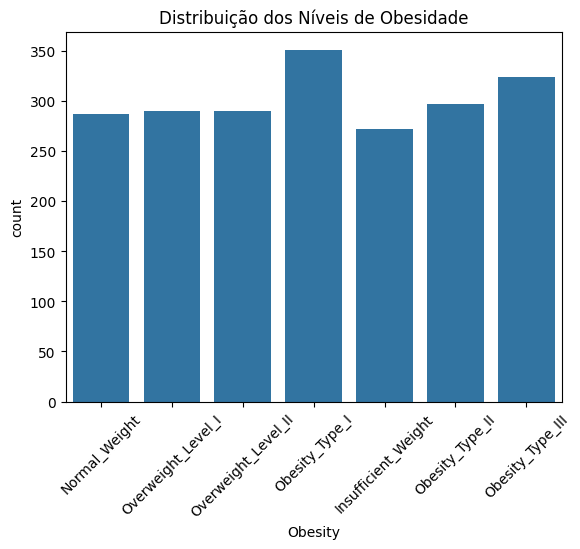

In [4]:
# 📊 Etapa 3 – Análise Exploratória de Dados
# Criando visualizações com seaborn ou matplotlib
sns.countplot(x='Obesity', data=df)
# Criando visualizações com seaborn ou matplotlib
plt.xticks(rotation=45)
# Criando visualizações com seaborn ou matplotlib
plt.title('Distribuição dos Níveis de Obesidade')
# Criando visualizações com seaborn ou matplotlib
plt.show()

# 🤖 Etapa 5 – Treinamento do Modelo

In [5]:
# 🧠 Etapa 4 – Feature Engineering e Pré-processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Obesity', axis=1)
y = df['Obesity']

# Renomeando as colunas com base no dicionário fornecido
cat_cols = X.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧪 Etapa 6 – Avaliação do Modelo

In [6]:
# 🤖 Etapa 5 – Treinamento e Avaliação de Modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Importação de bibliotecas necessárias
import warnings
warnings.filterwarnings('ignore')

modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'\n🔍 Modelo: {nome}')
    print(f'Acurácia: {acc * 100:.2f}%')
    print('Relatório de Classificação:')
    print(classification_report(y_test, y_pred))
    print('---')


🔍 Modelo: Random Forest
Acurácia: 95.04%
Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.88      0.90      0.89        62
     Obesity_Type_I       0.99      0.96      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.88      0.87        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

---

🔍 Modelo: Gradient Boosting
Acurácia: 95.04%
Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        56
      Normal_Weight       0.90      0.85      0.88     

# 📈 Etapa 7 – Visualizações Finais e Conclusões

In [7]:
app_code = '''
# Importação de bibliotecas necessárias
import streamlit as st
# Importação de bibliotecas necessárias
import joblib
# Importação de bibliotecas necessárias
import numpy as np

# Carregar modelo treinado
modelo = joblib.load('modelo.pkl')

# Título do app
st.title("🏥 Sistema Preditivo de Obesidade")
st.markdown("Este aplicativo utiliza um modelo de Machine Learning para prever o nível de obesidade de um paciente com base em informações pessoais e comportamentais.")

# Campos de entrada
gender = st.selectbox("Gênero", ["Male", "Female"])
age = st.slider("Idade", 10, 100, 25)
height = st.number_input("Altura (em metros)", min_value=1.0, max_value=2.5, step=0.01, value=1.70)
weight = st.number_input("Peso (em kg)", min_value=30.0, max_value=200.0, step=0.1, value=70.0)
family_history = st.selectbox("Histórico familiar de obesidade?", ["yes", "no"])
favc = st.selectbox("Consome alimentos calóricos com frequência?", ["yes", "no"])
fcvc = st.slider("Frequência de vegetais na dieta (0 a 3)", 0.0, 3.0, 2.0)
ncp = st.slider("Nº de refeições principais por dia", 1, 5, 3)
caec = st.selectbox("Come entre as refeições?", ["no", "Sometimes", "Frequently", "Always"])
smoke = st.selectbox("Fuma?", ["yes", "no"])
ch2o = st.slider("Consumo de água por dia (0 a 3)", 0.0, 3.0, 2.0)
scc = st.selectbox("Controla ingestão calórica?", ["yes", "no"])
faf = st.slider("Frequência de atividade física (0 a 3)", 0.0, 3.0, 1.0)
ter = st.slider("Tempo com tecnologia (0 a 3)", 0.0, 3.0, 2.0)
calc = st.selectbox("Frequência de consumo de álcool", ["no", "Sometimes", "Frequently", "Always"])
mtrans = st.selectbox("Meio de transporte", ["Public_Transportation", "Walking", "Automobile", "Motorbike", "Bike"])

# Botão de previsão
if st.button("🔍 Prever Nível de Obesidade"):
    entrada = np.array([[
        1 if gender == "Male" else 0,
        age,
        height,
        weight,
        1 if family_history == "yes" else 0,
        1 if favc == "yes" else 0,
        fcvc,
        ncp,
        ["no", "Sometimes", "Frequently", "Always"].index(caec),
        1 if smoke == "yes" else 0,
        ch2o,
        1 if scc == "yes" else 0,
        faf,
        ter,
        ["no", "Sometimes", "Frequently", "Always"].index(calc),
        ["Public_Transportation", "Walking", "Automobile", "Motorbike", "Bike"].index(mtrans)
    ]])

    predicao = modelo.predict(entrada)
    st.success(f"Nível de Obesidade Previsto: **{predicao[0]}**")
'''

# Salvar como app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py gerado com sucesso.")

✅ app.py gerado com sucesso.


In [8]:
with open("requirements.txt", "w") as f:
    f.write("streamlit\nscikit-learn\nnumpy\njoblib")

In [9]:
# Importação de bibliotecas necessárias
import joblib
from sklearn.ensemble import RandomForestClassifier

modelo_final = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_final.fit(X_train, y_train)
joblib.dump(modelo_final, 'modelo.pkl')  # ✅ cria o arquivo modelo.pkl

['modelo.pkl']